In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing files
file_path_ongevallen = "C:\\Users\\20203730\\Documents\\TU Delft\\Python project\\ongevallen.txt"
file_path_wegvakken = "C:\\Users\\20203730\\Documents\\TU Delft\\Python project\\wegvakken.txt"
file_path_partijen = "C:\\Users\\20203730\\Documents\\TU Delft\\Python project\\partijen.txt"

#Reaing files
df_ong = pd.read_csv(file_path_ongevallen, delimiter=',', encoding='utf-8', low_memory=False)
df_weg = pd.read_csv(file_path_wegvakken, delimiter=',', encoding='utf-8', low_memory=False)
df_par = pd.read_csv(file_path_partijen, delimiter=',', encoding='utf-8', low_memory=False)

merged_df = pd.merge(df_weg, df_ong, left_on='WVK_ID', right_on='WVK_ID', how='outer')              #Merging Wegvakken and Ongevallen
merged_df2 = pd.merge(df_par, df_ong, left_on='VKL_NUMMER', right_on='VKL_NUMMER', how='outer')     #Merging Partijen and Ongevallen


In [2]:
#Check if merge is succesfull
print("Merged DataFrame columns:", merged_df.columns.tolist())
print("Merged DataFrame columns:", merged_df2.columns.tolist())


Merged DataFrame columns: ['WVK_ID', 'WVK_BEGDAT', 'WVK_ENDDAT', 'JTE_ID_BEG', 'JTE_ID_END', 'WEGBEHSRT', 'WEGNUMMER', 'WEGDEELLTR', 'HECTOLTTR', 'BST_CODE', 'RPE_CODE', 'RIJRICHTNG', 'STT_TYPE', 'STT_NAAM', 'WPSNAAM', 'GME_ID_x', 'GME_NAAM_x', 'HNRSTRLNKS', 'HNRSTRRHTS', 'E_HNR_LNKS', 'E_HNR_RHTS', 'L_HNR_LNKS', 'L_HNR_RHTS', 'KLOK_BEG', 'KLOK_END', 'SLE_TYPE', 'SLE_NUMMER', 'FK_VELD1', 'FK_VELD5_x', 'ROUTELTR', 'ROUTENR', 'ROUTELTR2', 'ROUTENR2', 'ROUTELTR3', 'ROUTENR3', 'ROUTELTR4', 'ROUTENR4', 'WEGNR_HMP', 'VKL_NUMMER', 'REGNUMMER', 'PVOPGEM', 'DATUM_VKL', 'DAG_CODE', 'MND_NUMMER', 'JAAR_VKL', 'TIJDSTIP', 'UUR', 'DDL_ID', 'AP3_CODE', 'AP4_CODE', 'AP5_CODE', 'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV', 'ANTL_PTJ', 'ANTL_TDT', 'MNE_CODE', 'AOL_ID', 'NIVEAUKOP', 'WSE_ID', 'WSE_AN', 'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN', 'LGD_ID', 'ZAD_ID', 'WGD_CODE_1', 'WGD_CODE_2', 'BZD_ID_VM1', 'BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', '

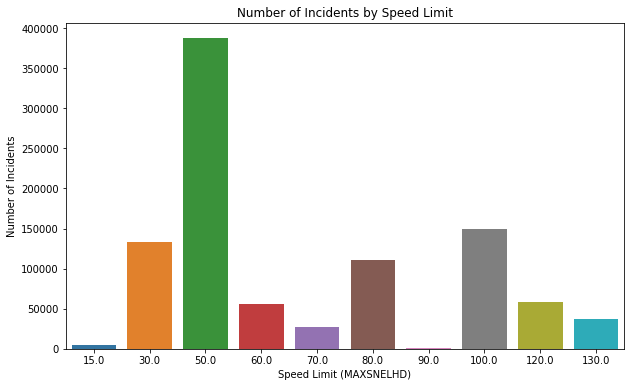

In [3]:
#Plot to test full dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='MAXSNELHD', data=merged_df)
plt.title('Number of Incidents by Speed Limit')
plt.xlabel('Speed Limit (MAXSNELHD)')
plt.ylabel('Number of Incidents')

plt.show()

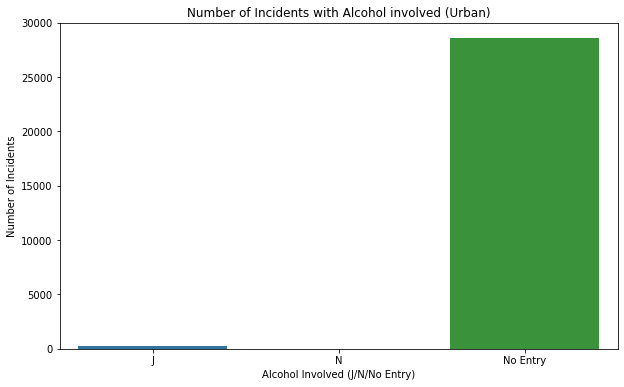

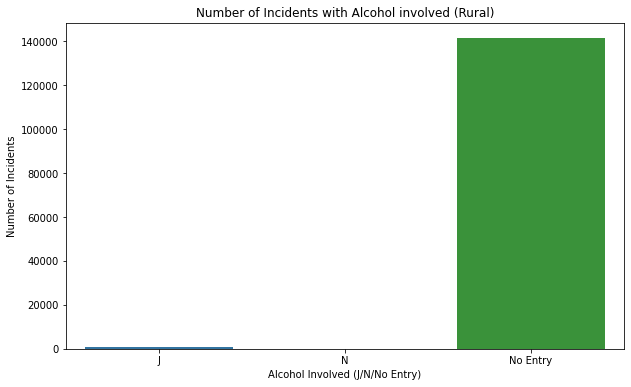

In [10]:
#Separating urban and rural Municipalities by selecting the top 3 and bottom 35 on population density
urban_df = merged_df[merged_df['GME_NAAM_x'].isin(["s-Gravenhage", "Leiden", "Haarlem"])].copy()
rural_df = merged_df[merged_df['GME_NAAM_x'].isin([
    "Dinkelland", "Schouwen-Duiveland", "De Fryske Marren",
    "Tubbergen", "Hollands Kroon", "Hulst", "Opsterland",
    "Dronten", "Staphorst", "Bergen (L.)", "Bronckhorst",
    "Coevorden", "Noardeast-Fryslân", "Weststellingwerf",
    "Ooststellingwerf", "Alphen-Chaam", "De Wolden",
    "Noordoostpolder", "Ommen", "Het Hogeland",
    "Midden-Drenthe", "Zeewolde", "Westerwolde",
    "Borger-Odoorn", "Aa en Hunze", "Baarle-Nassau",
    "Noord-Beveland", "Texel", "Sluis", "Westerveld",
    "Ameland", "Rozendaal", "Terschelling", "Vlieland",
    "Schiermonnikoog"
])].copy()

#Filling all empty rows with 'No Entry' so they show up in figure
urban_df.loc[:, 'IND_ALC'] = urban_df['IND_ALC'].fillna('No Entry')
rural_df.loc[:, 'IND_ALC'] = rural_df['IND_ALC'].fillna('No Entry')

# Urban count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='IND_ALC', data=urban_df, order=['J', 'N', 'No Entry'])  # Specify order if needed
plt.title('Number of Incidents with Alcohol involved (Urban)')
plt.xlabel('Alcohol Involved (J/N/No Entry)')
plt.ylabel('Number of Incidents')
plt.show()

# Rural count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='IND_ALC', data=rural_df, order=['J', 'N', 'No Entry'])  # Specify order if needed
plt.title('Number of Incidents with Alcohol involved (Rural)')
plt.xlabel('Alcohol Involved (J/N/No Entry)')
plt.ylabel('Number of Incidents')
plt.show()



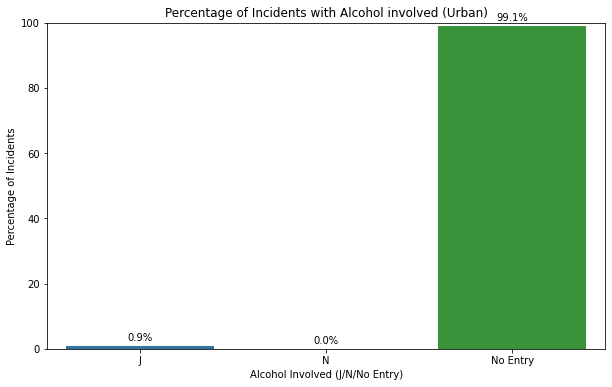

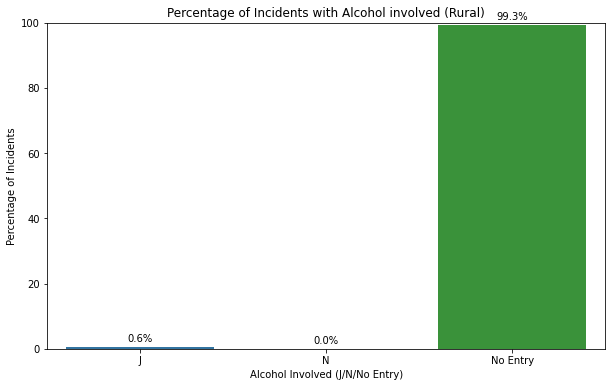

In [5]:
# Calculate percentages for urban incidents
urban_percentages = (
    urban_df['IND_ALC']
    .value_counts(normalize=True)  # Normalize to get percentages
    .mul(100)  # Convert to percentage
    .reindex(['J', 'N', 'No Entry'], fill_value=0)  # Ensure consistent order
)

# Calculate percentages for rural incidents
rural_percentages = (
    rural_df['IND_ALC']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(['J', 'N', 'No Entry'], fill_value=0)
)

# Plot for urban
plt.figure(figsize=(10, 6))
sns.barplot(x=urban_percentages.index, y=urban_percentages.values)
plt.title('Percentage of Incidents with Alcohol involved (Urban)')
plt.xlabel('Alcohol Involved (J/N/No Entry)')
plt.ylabel('Percentage of Incidents')
plt.ylim(0, 100)  # Set y-axis to show 0-100% range

#Show percentage just above the bars
for i, value in enumerate(urban_percentages.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()

# Plot for rural
plt.figure(figsize=(10, 6))
sns.barplot(x=rural_percentages.index, y=rural_percentages.values)
plt.title('Percentage of Incidents with Alcohol involved (Rural)')
plt.xlabel('Alcohol Involved (J/N/No Entry)')
plt.ylabel('Percentage of Incidents')
plt.ylim(0, 100)

#Show percentage just above the bars
for i, value in enumerate(rural_percentages.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()

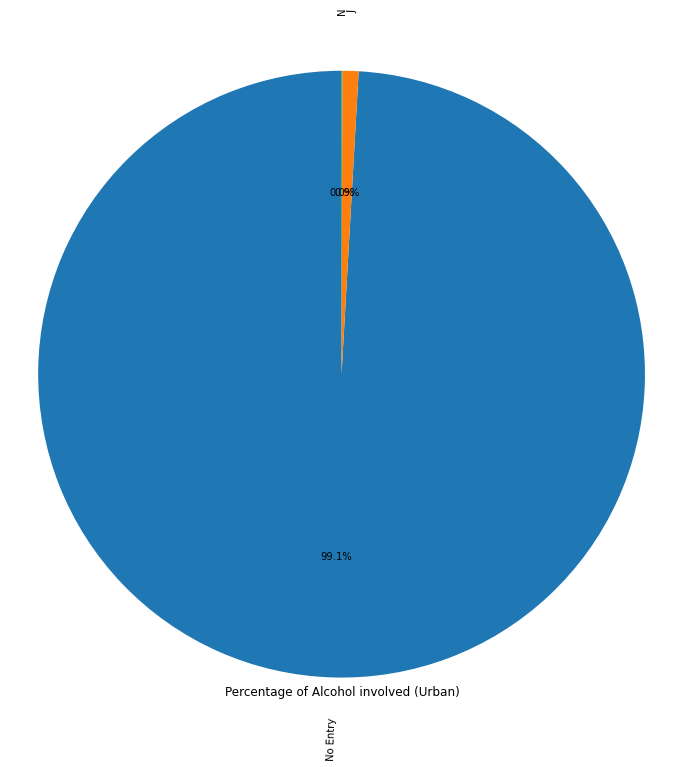

In [6]:
incident_counts = urban_df['IND_ALC'].value_counts()  # Use the mapped labels
incident_percentages = incident_counts / incident_counts.sum() * 100

# Plot the pie chart
# Pie chart with no labels initially
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(
    incident_percentages, 
    autopct='%1.1f%%', 
    startangle=90,
    labeldistance=1.2
)

# Add labels manually, ensuring perpendicular alignment
for i, text in enumerate(texts):
    x, y = text.get_position()
    rotation = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    rotation = rotation + 180 if x < 0 else rotation  # Flip for labels on left side
    
    ax.text(
        x, y, incident_percentages.index[i],  # Use descriptive label
        ha='center', va='center',
        rotation=rotation,
        rotation_mode='anchor',  # Ensures text rotates relative to anchor point
        fontsize=10
    )

plt.title('Percentage of Alcohol involved (Urban)', y=0.0)
plt.axis('equal')
plt.show()

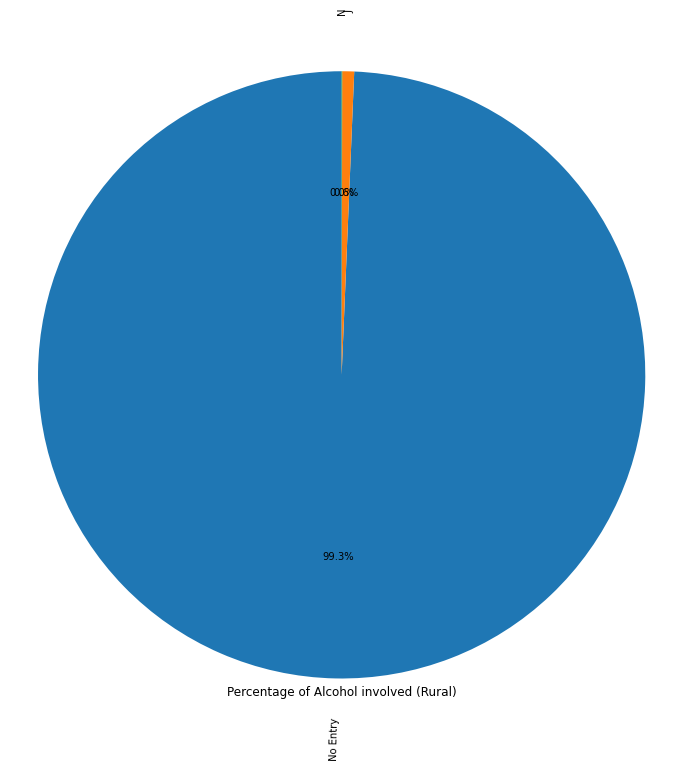

In [7]:
incident_counts = rural_df['IND_ALC'].value_counts()  # Use the mapped labels
incident_percentages = incident_counts / incident_counts.sum() * 100

# Plot the pie chart
# Pie chart with no labels initially
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(
    incident_percentages, 
    autopct='%1.1f%%', 
    startangle=90,
    labeldistance=1.2
)

# Add labels manually, ensuring perpendicular alignment
for i, text in enumerate(texts):
    x, y = text.get_position()
    rotation = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    rotation = rotation + 180 if x < 0 else rotation  # Flip for labels on left side
    
    ax.text(
        x, y, incident_percentages.index[i],  # Use descriptive label
        ha='center', va='center',
        rotation=rotation,
        rotation_mode='anchor',  # Ensures text rotates relative to anchor point
        fontsize=10
    )

plt.title('Percentage of Alcohol involved (Rural)', y=0.0)
plt.axis('equal')
plt.show()

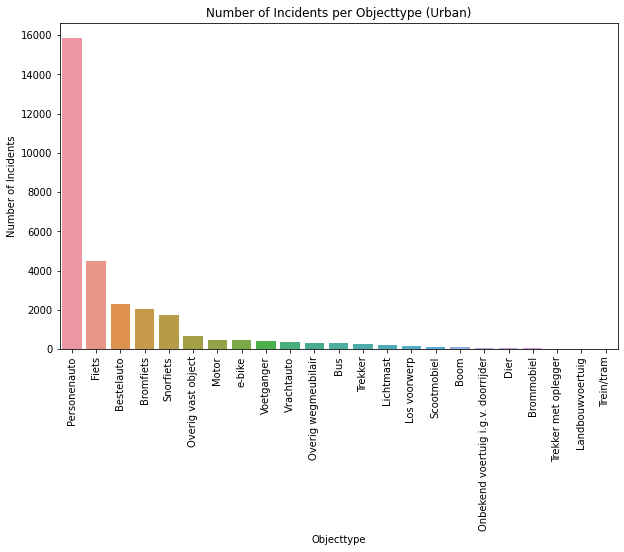

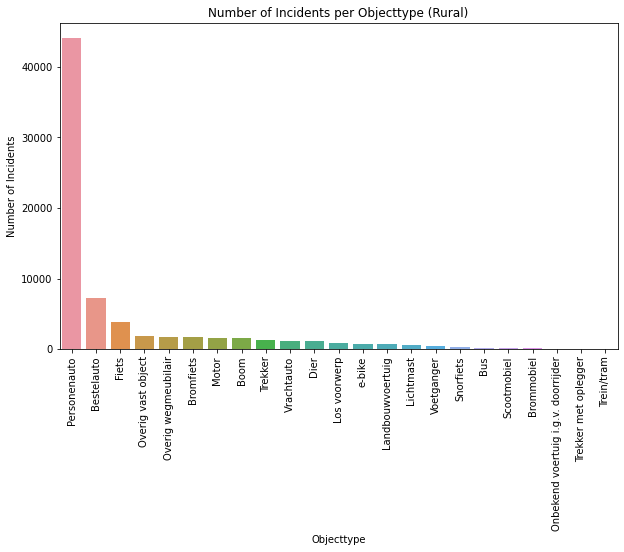

In [9]:
#Again defining the urban and rural dataframe, but this time with the dataset with Ongevallen and Partijen merged
urban_df2 = merged_df2[merged_df2.loc[:, 'GME_NAAM'].isin(["s-Gravenhage", "Leiden", "Haarlem"])].copy()
rural_df2 = merged_df2[merged_df2.loc[:, 'GME_NAAM'].isin([
    "Dinkelland", "Schouwen-Duiveland", "De Fryske Marren",
    "Tubbergen", "Hollands Kroon", "Hulst", "Opsterland",
    "Dronten", "Staphorst", "Bergen (L.)", "Bronckhorst",
    "Coevorden", "Noardeast-Fryslân", "Weststellingwerf",
    "Ooststellingwerf", "Alphen-Chaam", "De Wolden",
    "Noordoostpolder", "Ommen", "Het Hogeland",
    "Midden-Drenthe", "Zeewolde", "Westerwolde",
    "Borger-Odoorn", "Aa en Hunze", "Baarle-Nassau",
    "Noord-Beveland", "Texel", "Sluis", "Westerveld",
    "Ameland", "Rozendaal", "Terschelling", "Vlieland",
    "Schiermonnikoog"
])].copy()

#Dictionary to map the numbers in the data to Objecttype in text
ote_id_mapping = {
    1: 'Personenauto',
    11: 'Bestelauto',
    21: 'Vrachtauto',
    22: 'Trekker',
    23: 'Trekker met oplegger',
    24: 'Bus',
    31: 'Motor',
    41: 'Landbouwvoertuig',
    51: 'Trein/tram',
    61: 'Bromfiets',
    62: 'Snorfiets',
    63: 'Brommobiel',
    64: 'Fiets',
    71: 'Voetganger',
    81: 'Boom',
    82: 'Lichtmast',
    83: 'Overig vast object',
    84: 'Los voorwerp',
    85: 'Overig wegmeubilair',
    91: 'Dier',
    95: 'Onbekend voertuig i.g.v. doorrijder',
    65: 'Scootmobiel',
    66: 'e-bike'
}

#Apllying this mapping to the data
urban_df2.loc[:, 'OTE_Label'] = urban_df2['OTE_ID'].replace(ote_id_mapping)
rural_df2.loc[:, 'OTE_Label'] = rural_df2['OTE_ID'].replace(ote_id_mapping)


#Ordering results, descending
urban_counts = urban_df2.loc[:, 'OTE_Label'].value_counts().sort_values(ascending=False)
rural_counts = rural_df2.loc[:, 'OTE_Label'].value_counts().sort_values(ascending=False)

urban_df2.loc[:, 'OTE_Label'] = pd.Categorical(
    urban_df2.loc[:, 'OTE_Label'], 
    categories=urban_counts.index, 
    ordered=True
)

rural_df2.loc[:, 'OTE_Label'] = pd.Categorical(
    rural_df2.loc[:, 'OTE_Label'], 
    categories=rural_counts.index, 
    ordered=True
)

#Plotting the figures
plt.figure(figsize=(10, 6))
sns.countplot(x='OTE_Label', data=urban_df2, order=urban_counts.index)
plt.title('Number of Incidents per Objecttype (Urban)')
plt.xlabel('Objecttype')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)  # Improving readability
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='OTE_Label', data=rural_df2, order=rural_counts.index)
plt.title('Number of Incidents per Objecttype (Rural)')
plt.xlabel('Objecttype')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)  # Improving readability
plt.show()

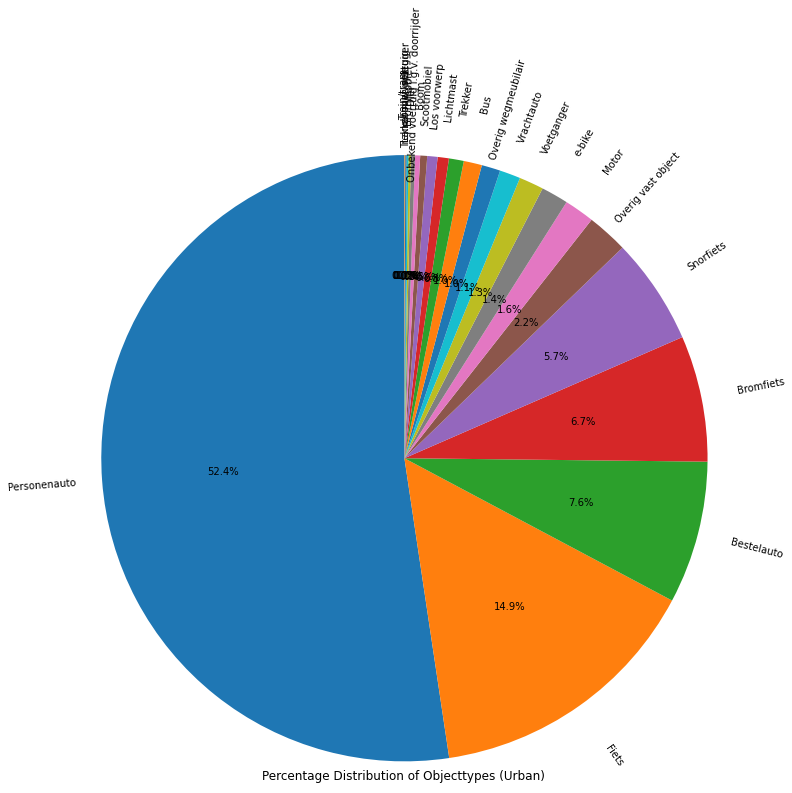

In [9]:
incident_counts = urban_df2['OTE_Label'].value_counts()  # Use the mapped labels
incident_percentages = incident_counts / incident_counts.sum() * 100

# Plot the pie chart
# Pie chart with no labels initially
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(
    incident_percentages, 
    autopct='%1.1f%%', 
    startangle=90,
    labeldistance=1.2
)

# Add labels manually, ensuring perpendicular alignment
for i, text in enumerate(texts):
    x, y = text.get_position()
    rotation = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    rotation = rotation + 180 if x < 0 else rotation  # Flip for labels on left side
    
    ax.text(
        x, y, incident_percentages.index[i],  # Use descriptive label
        ha='center', va='center',
        rotation=rotation,
        rotation_mode='anchor',  # Ensures text rotates relative to anchor point
        fontsize=10
    )

plt.title('Percentage Distribution of Objecttypes (Urban)', y=0.0)
plt.axis('equal')
plt.show()

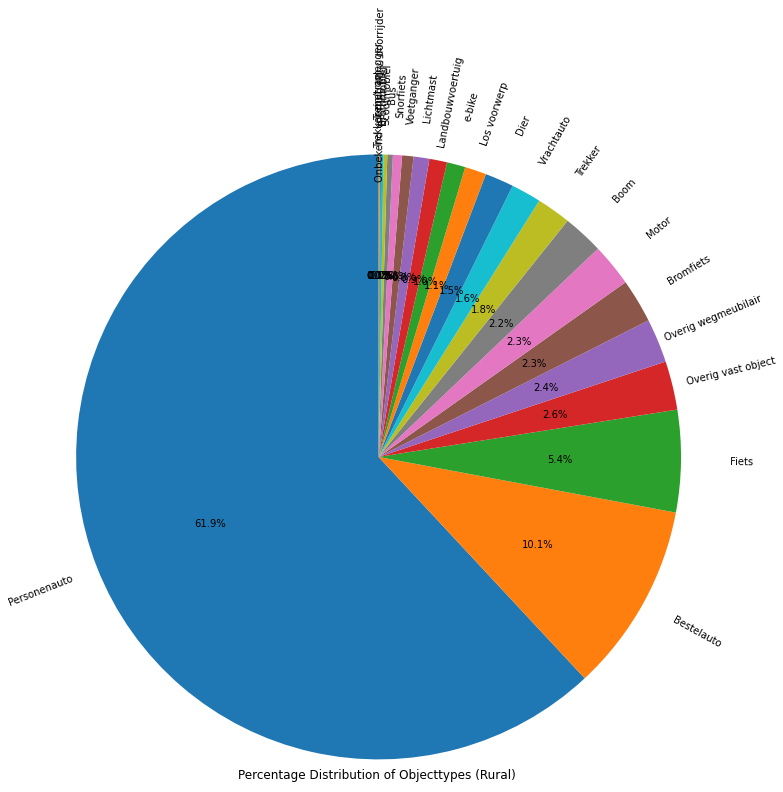

In [10]:
incident_counts = rural_df2['OTE_Label'].value_counts()  # Use the mapped labels
incident_percentages = incident_counts / incident_counts.sum() * 100

# Plot the pie chart
# Pie chart with no labels initially
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(
    incident_percentages, 
    autopct='%1.1f%%', 
    startangle=90,
    labeldistance=1.2
)

# Add labels manually, ensuring perpendicular alignment
for i, text in enumerate(texts):
    x, y = text.get_position()
    rotation = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    rotation = rotation + 180 if x < 0 else rotation  # Flip for labels on left side
    
    ax.text(
        x, y, incident_percentages.index[i],  # Use descriptive label
        ha='center', va='center',
        rotation=rotation,
        rotation_mode='anchor',  # Ensures text rotates relative to anchor point
        fontsize=10
    )

plt.title('Percentage Distribution of Objecttypes (Rural)', y=0.0)
plt.axis('equal')
plt.show()